In [1]:
import numpy as np
import os
import pickle
import json

from shutil import unpack_archive
from collections import OrderedDict, defaultdict

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
%matplotlib inline

from utils import tsplot

In [2]:
# Customize matplotlib appearance
sns.set_style("white")
matplotlib.rc('axes', titlesize=13, labelsize=20)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

In [3]:
# Auxiliary functions
def parse_results(res):
    parsed_res = []
    for k, v in res.items():
        if k == 'episode':
            continue
        a1, a2 = k.split('_vs_')
        a2, m = a2.split('_')
        if m.endswith("1"):
            parsed_res.append((a1, a2, m[:-1], v))
        if m.endswith("2"):
            parsed_res.append((a2, a1, m[:-1], v))
    return parsed_res

In [4]:
# Extract results
%rm -r IMP IPD
unpack_archive("IMP.zip")
unpack_archive("IPD.zip")

In [5]:
# Load results
results = {}

results['IMP'] = defaultdict(list)
for seed in range(len(os.listdir("IMP"))):
    with open("IMP/seed-%d/progress.json" % seed) as fp:
        lines = fp.readlines()
    for l in lines:
        for a1, a2, m, v in parse_results(json.loads(l.strip())):
            results['IMP'][(a1, a2, m, seed)].append(v)

results['IPD'] = defaultdict(list)
for seed in range(len(os.listdir("IMP"))):
    with open("IPD/seed-%d/progress.json" % seed) as fp:
        lines = fp.readlines()
    for l in lines:
        for a1, a2, m, v in parse_results(json.loads(l.strip())):
            results['IPD'][(a1, a2, m, seed)].append(v)
            
agents = ['NL-Q', 'JAL-Q', 'PHC', 'WoLF', 'NL-PG', 'LOLA']

## Normalized discounted returns (for the first agent in each pair)
Note: diagonal entries are NOT self-play because each agent has a separate set of parameters.

### Iterated Matching Pennies

/usr/local/var/pyenv/versions/3.5.2/envs/venv3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


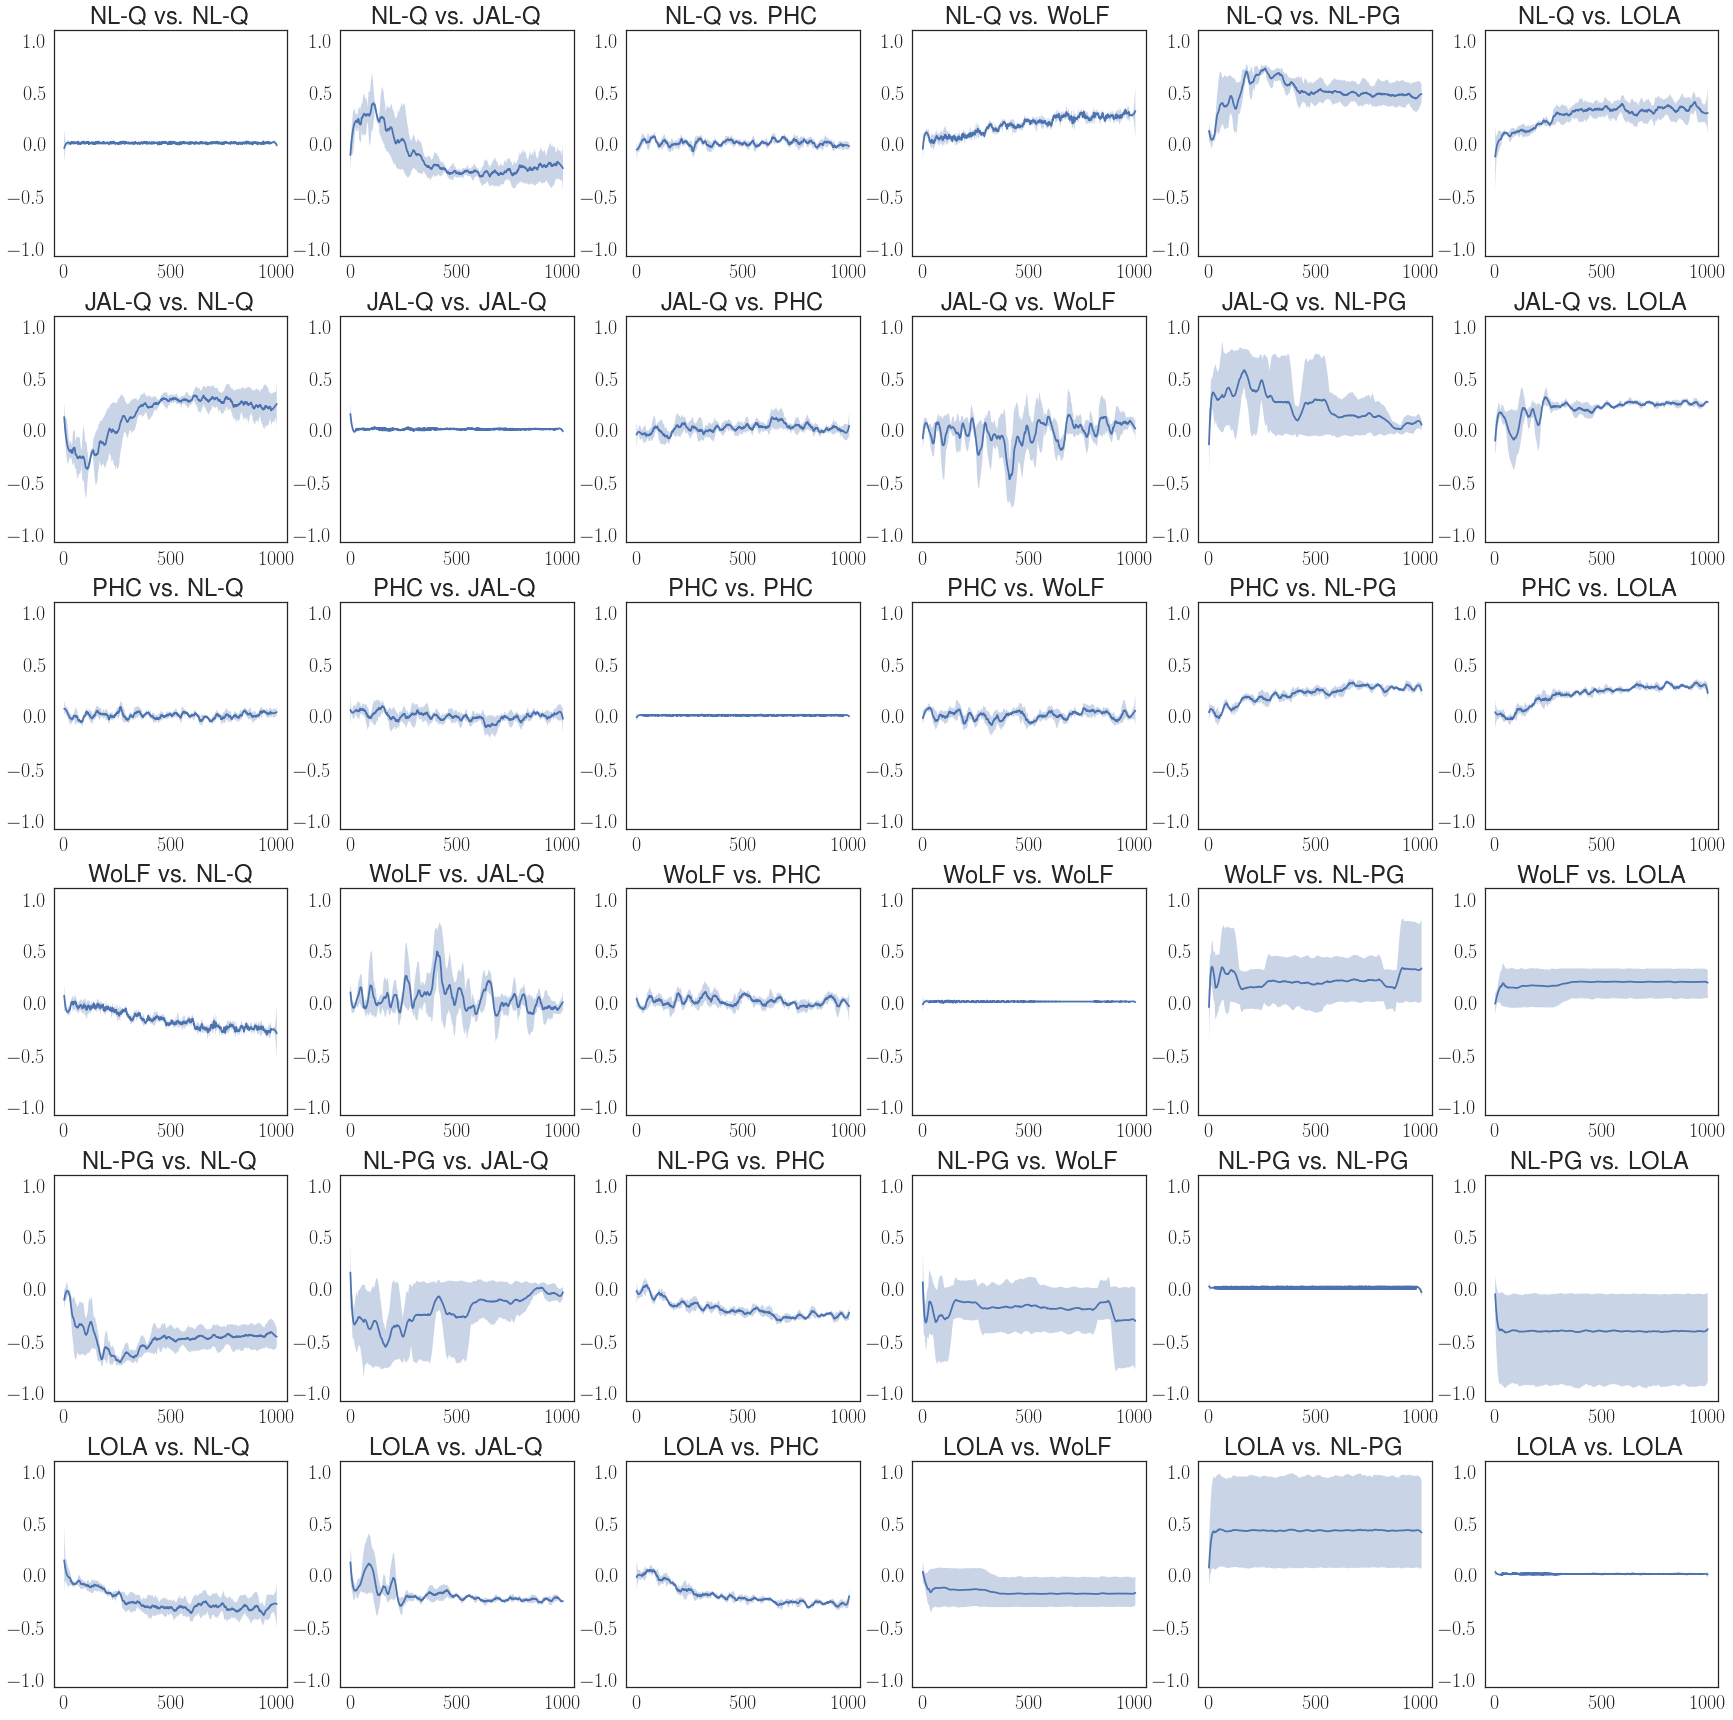

In [6]:
# Plot normalized discounted returns over episodes for IMP
fig, axes = plt.subplots(6, 6, figsize=(24, 24))

res = results['IMP']
for i1, a1 in enumerate(agents):
    for i2, a2 in enumerate(agents):
        ax = axes[i1, i2]
        ax.set_title(a1 + ' vs. ' + a2, fontsize=24)
        episodes = np.repeat(np.arange(len(res[a1, a2, 'ret', 0]))[None, :], len(os.listdir("IMP")), axis=0)
        rets = np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IMP")))])
        tsplot(episodes, rets, ax, ci=68, resample=1000, window_length=51)
        ax.set_ylim([-1.1, 1.1])

fig.tight_layout()

### Iterated Prisoner's Dilemma

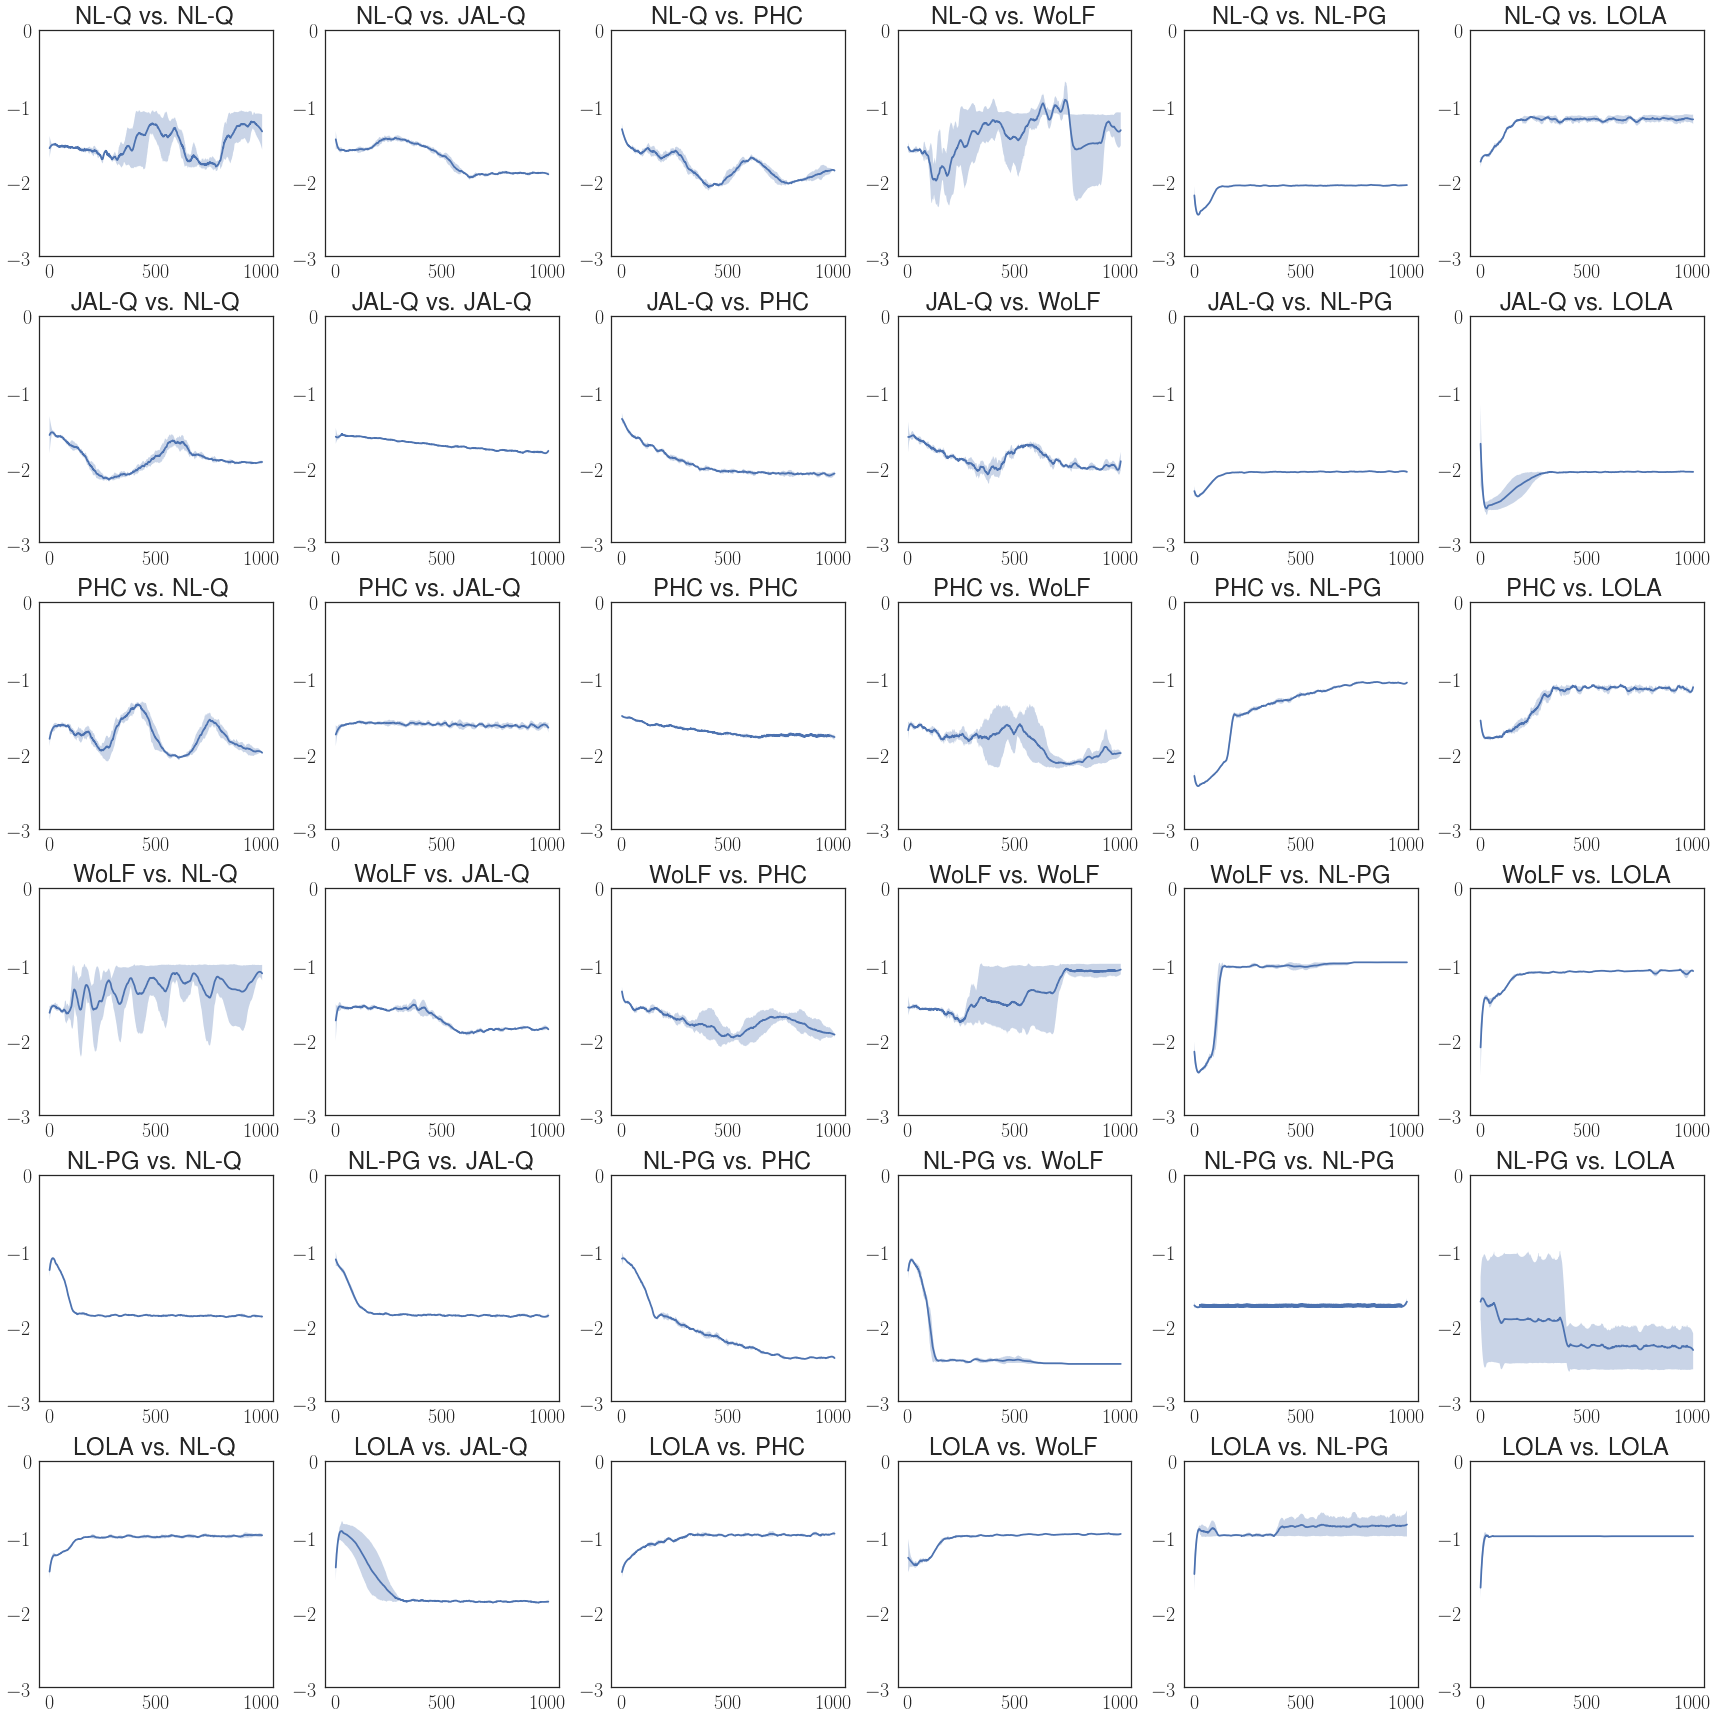

In [7]:
# Plot normalized discounted returns over episodes for IPD
fig, axes = plt.subplots(6, 6, figsize=(24, 24))

res = results['IPD']
for i1, a1 in enumerate(agents):
    for i2, a2 in enumerate(agents):
        ax = axes[i1, i2]
        ax.set_title(a1 + ' vs. ' + a2, fontsize=24)
        episodes = np.repeat(np.arange(len(res[a1, a2, 'ret', 0]))[None, :], len(os.listdir("IPD")), axis=0)
        rets = np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IPD")))])
        tsplot(episodes, rets, ax, ci=68, resample=1000, window_length=51)
        ax.set_ylim([-3., 0.])

fig.tight_layout()

## Empirical probabilities of selecting the first action during an episode

### Iterated Matching Pennies

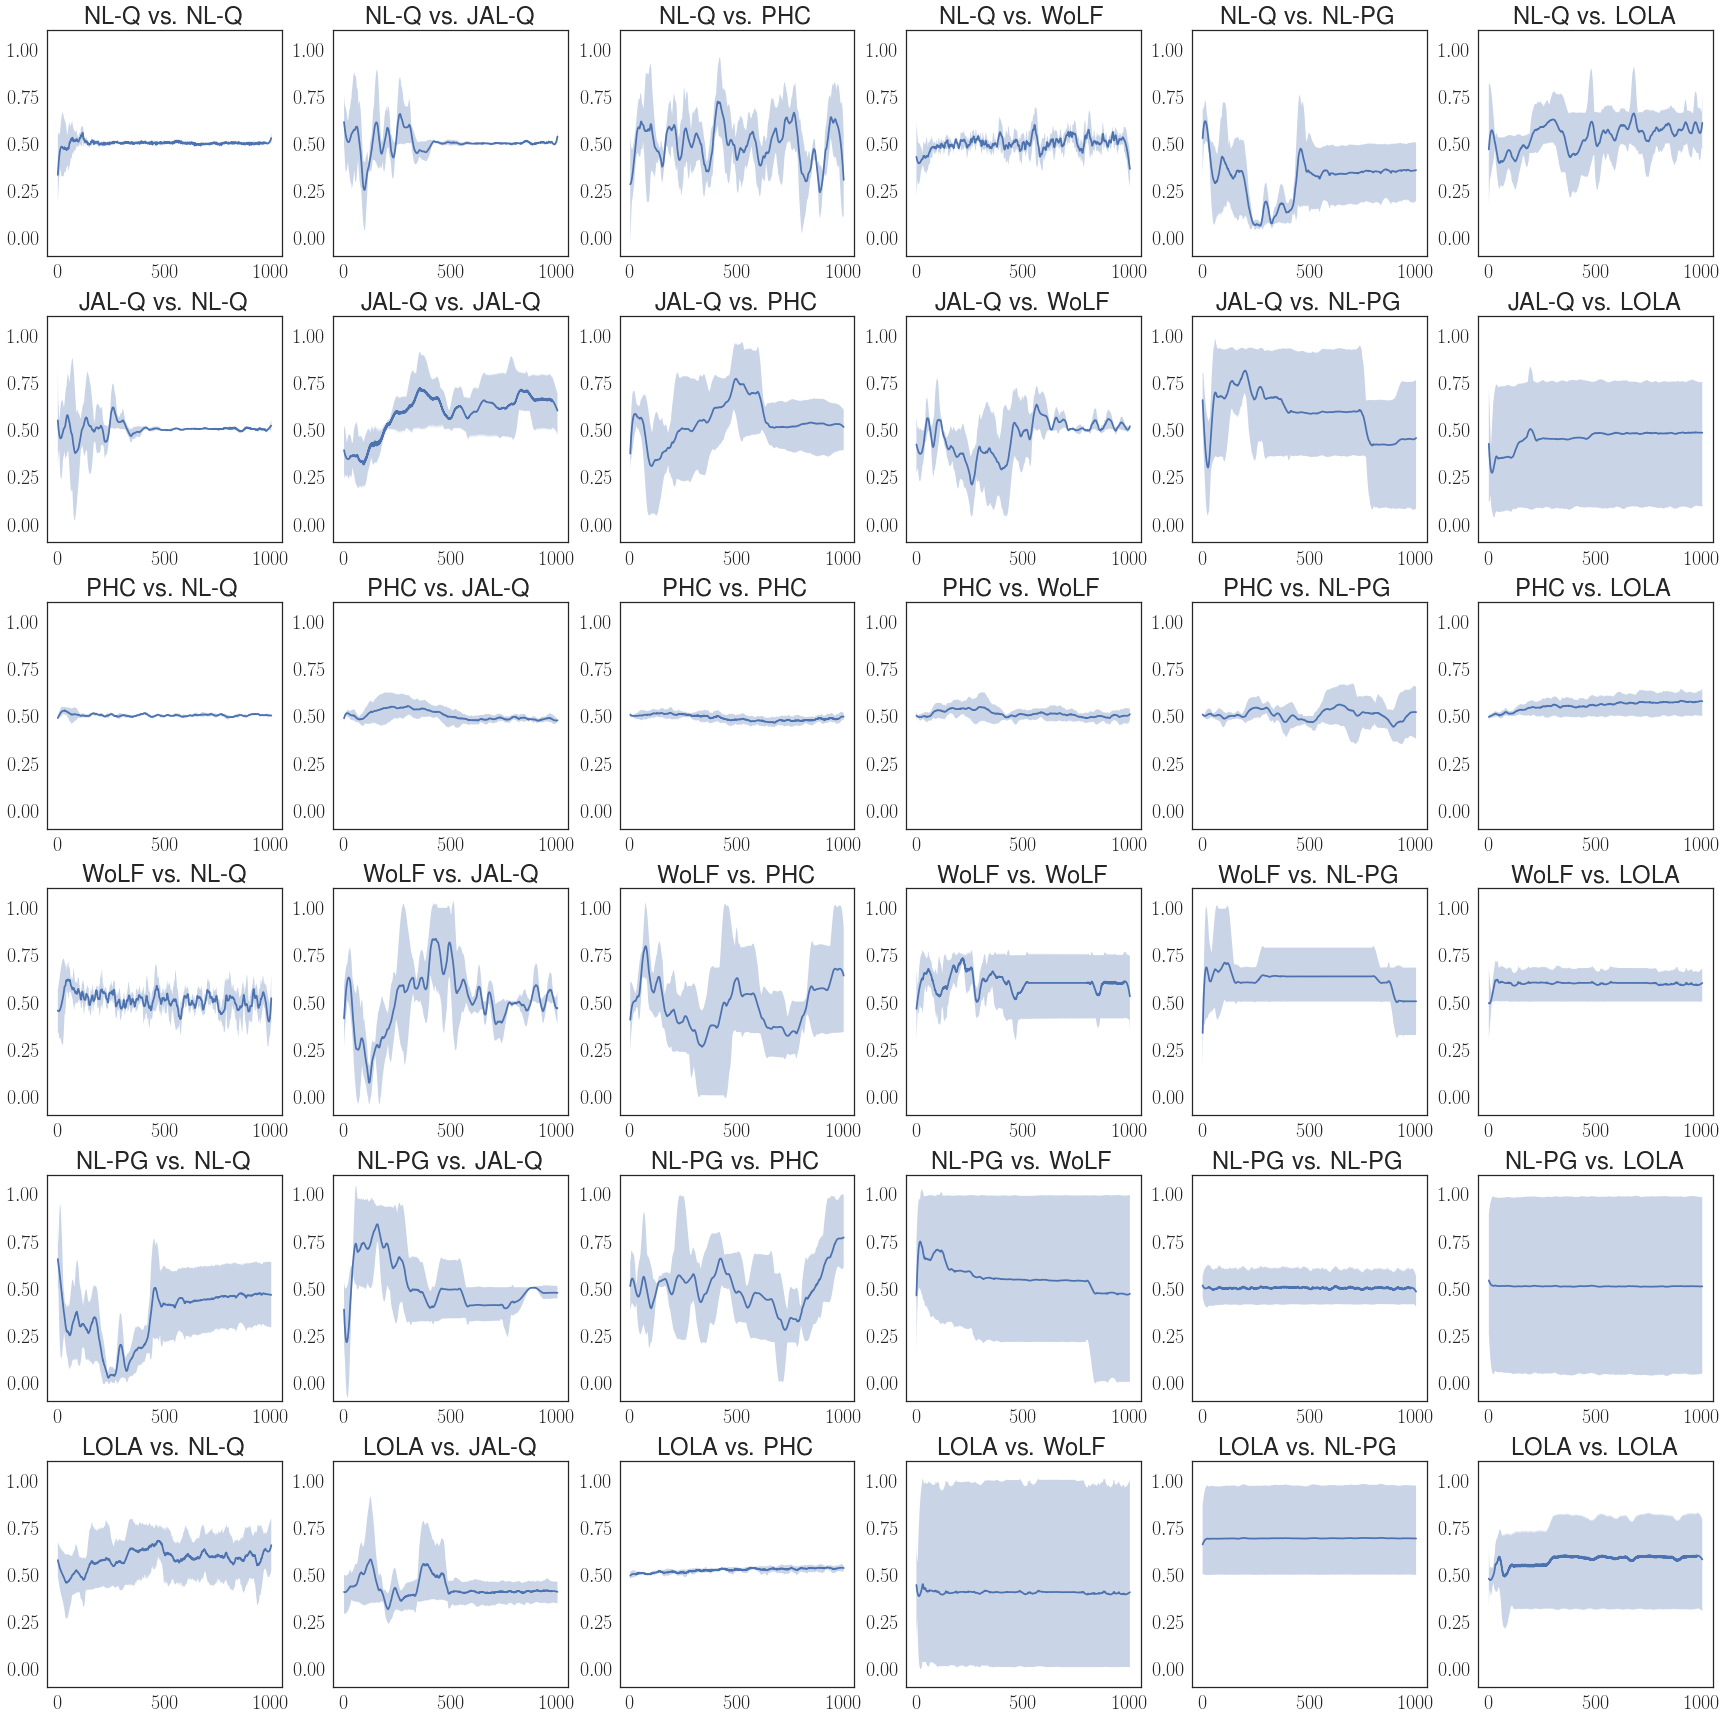

In [8]:
# Plot empirical probs of playin the FIRST action in IMP
fig, axes = plt.subplots(6, 6, figsize=(24, 24))

res = results['IMP']
for i1, a1 in enumerate(agents):
    for i2, a2 in enumerate(agents):
        ax = axes[i1, i2]
        ax.set_title(a1 + ' vs. ' + a2, fontsize=24)
        episodes = np.repeat(np.arange(len(res[a1, a2, 'pi', 0]))[None, :], len(os.listdir("IMP")), axis=0)
        probs = np.asarray([res[a1, a2, 'pi', seed] for seed in range(len(os.listdir("IMP")))])
        tsplot(episodes, probs, ax, ci=68, resample=1000, window_length=51)
        ax.set_ylim([-0.1, 1.1])

fig.tight_layout()

### Iterated Prisoner's Dilemma

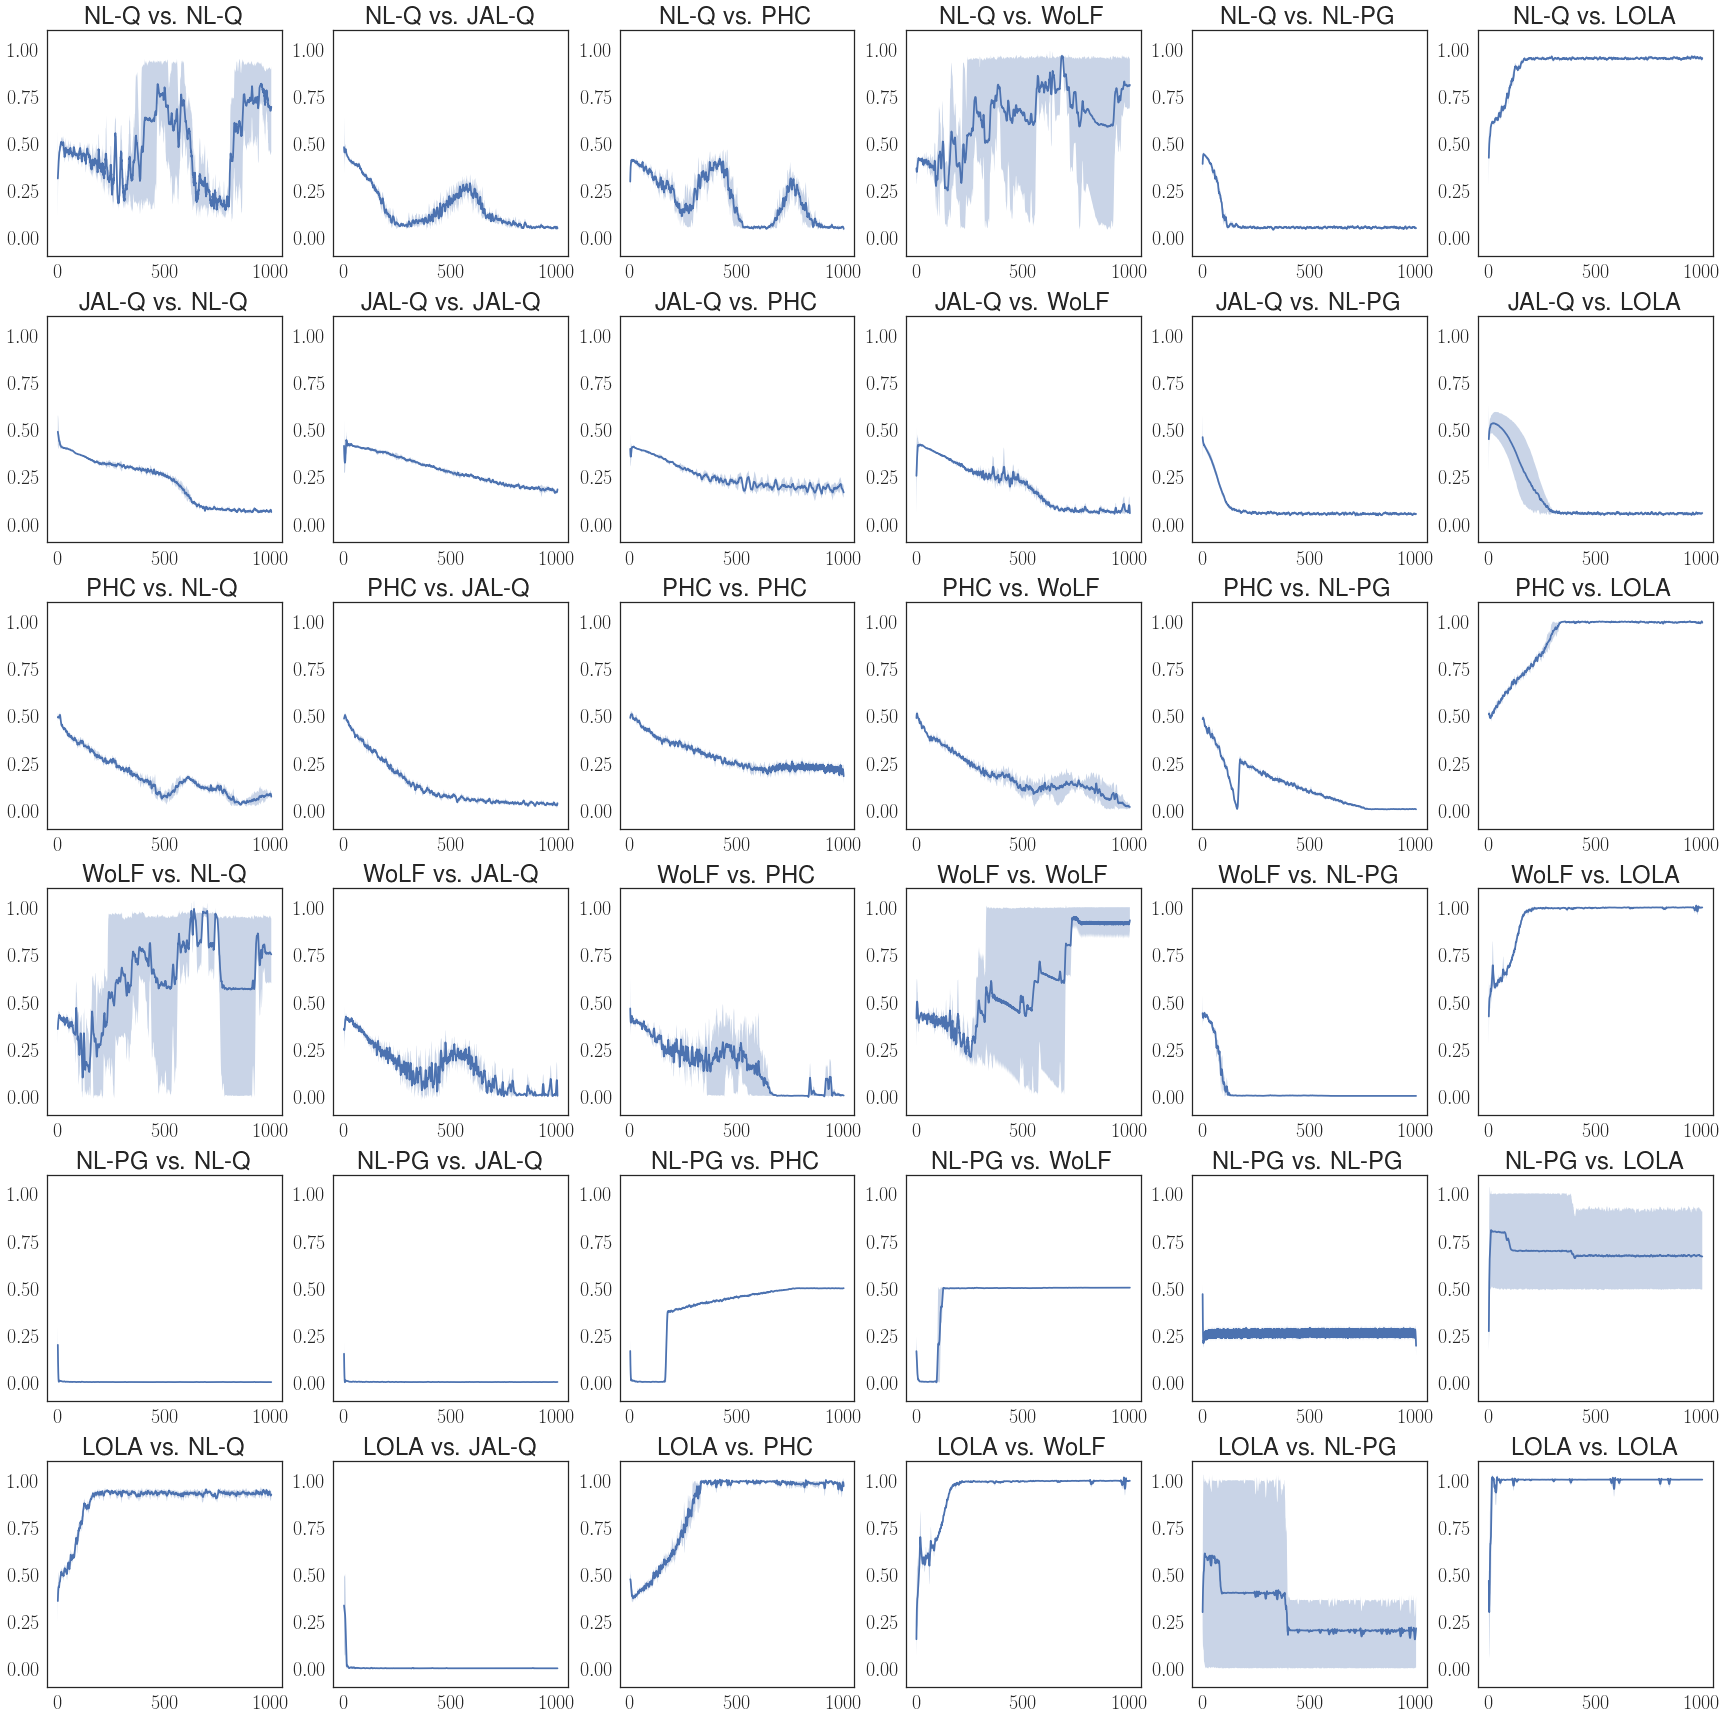

In [9]:
# Plot empirical probs of playin the FIRST action in IPD
fig, axes = plt.subplots(6, 6, figsize=(24, 24))

res = results['IPD']
for i1, a1 in enumerate(agents):
    for i2, a2 in enumerate(agents):
        ax = axes[i1, i2]
        ax.set_title(a1 + ' vs. ' + a2, fontsize=24)
        episodes = np.repeat(np.arange(len(res[a1, a2, 'pi', 0]))[None, :], len(os.listdir("IPD")), axis=0)
        probs = np.asarray([res[a1, a2, 'pi', seed] for seed in range(len(os.listdir("IPD")))])
        tsplot(episodes, probs, ax, ci=68, resample=1000, window_length=11)
        ax.set_ylim([-0.1, 1.1])

fig.tight_layout()

## Normalized discounted returns averaged over the tournament

### Iterated Matching Pennies

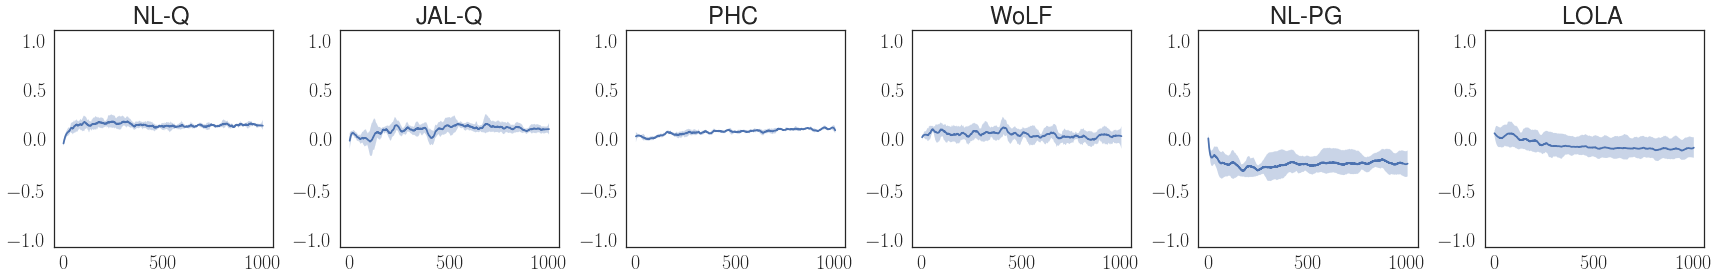

In [10]:
# Plot normalized discounted returns over episodes for IMP
fig, axes = plt.subplots(1, 6, figsize=(24, 4))

res = results['IMP']
for i1, a1 in enumerate(agents):
#     for i2, a2 in enumerate(agents):
    ax = axes[i1]
    ax.set_title(a1, fontsize=24)
    episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IMP")), axis=0)[:, :1000]
    rets = 0.
    for i2, a2 in enumerate(agents):
        rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IMP")))])[:, :1000]
    rets /= len(agents)
    tsplot(episodes, rets, ax, ci=68, resample=1000, window_length=51)
    ax.set_ylim([-1.1, 1.1])

fig.tight_layout()

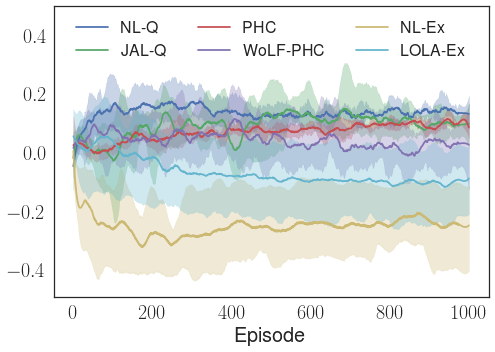

In [11]:
# Same thing but on the same plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
# ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")

colors = sns.color_palette()

res = results['IMP']
for i1, a1 in enumerate(agents):
    episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IMP")), axis=0)[:, :1000]
    rets = 0.
    for i2, a2 in enumerate(agents):
        rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IMP")))])[:, :1000]
    rets /= len(agents)
    tsplot(episodes, rets, ax, ci=90, color=colors[i1], resample=1000, window_length=51)
    ax.set_ylim([-.5, .5])

ax.legend(['NL-Q', 'JAL-Q', 'PHC', 'WoLF-PHC', 'NL-Ex', 'LOLA-Ex'], ncol=3, loc="upper center")

fig.tight_layout()
fig.savefig("tnt-results-IMP.pdf")

### Iterated Prisoner's Dilemma

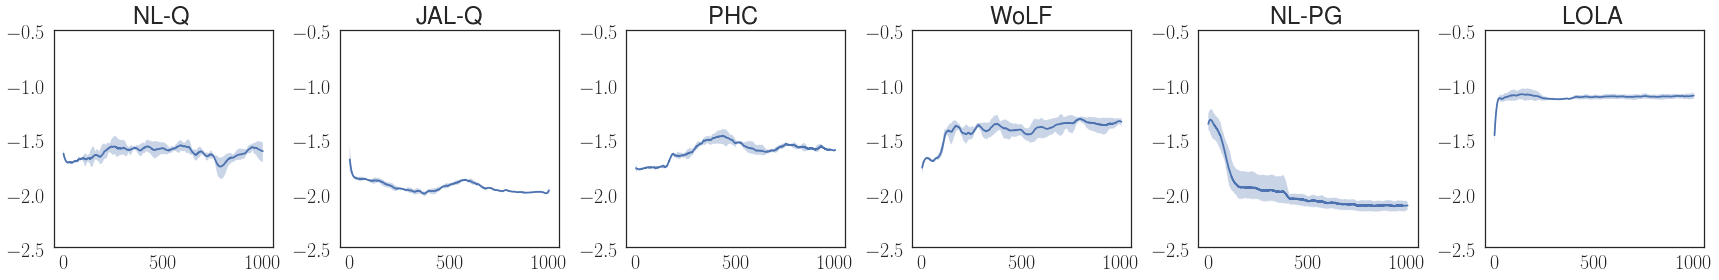

In [ ]:
# Plot normalized discounted returns over episodes for IPD
fig, axes = plt.subplots(1, 6, figsize=(24, 4))

res = results['IPD']
for i1, a1 in enumerate(agents):
    ax = axes[i1]
    ax.set_title(a1, fontsize=24)
    episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IPD")), axis=0)[:, :1000]
    rets = 0.
    for i2, a2 in enumerate(agents):
        rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IPD")))])[:, :1000]
    rets /= len(agents)
    tsplot(episodes, rets, ax, ci=68, resample=1000, window_length=51)
    ax.set_ylim([-2.5, -0.5])

fig.tight_layout()

In [ ]:
# Same thing but on the same plot
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_ylabel("Average reward per step")
ax.set_xlabel("Episode")

colors = sns.color_palette()

res = results['IPD']
for i1, a1 in enumerate(agents):
    episodes = np.repeat(np.arange(len(res[a1, a1, 'ret', 0]))[None, :], len(os.listdir("IPD")), axis=0)[:, :1000]
    rets = 0.
    for i2, a2 in enumerate(agents):
        rets += np.asarray([res[a1, a2, 'ret', seed] for seed in range(len(os.listdir("IPD")))])[:, :1000]
    rets /= len(agents)
    tsplot(episodes, rets, ax, ci=90, color=colors[i1], resample=1000, window_length=51)
    ax.set_ylim([-2.5, -0.5])

ax.legend(['NL-Q', 'JAL-Q', 'PHC', 'WoLF-PHC', 'NL-Ex', 'LOLA-Ex'], ncol=3, loc="upper center")

fig.tight_layout()
fig.savefig("tnt-results-IPD.pdf")